<a href="https://colab.research.google.com/github/dodozaki/deepleaning/blob/main/Textmining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load the library
import pandas as pd
import re
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')


import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import string
from collections import Counter

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Load data**


In [ ]:
#Load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/data extraction.csv'

In [ ]:
data= pd.read_csv(path)
data.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,0,2022-02-04 23:58:25+00:00,1489750218992078850,@KingOfTheFay \n\nShe’d like to kiss that bloo...,BreathOfAnguish,1,𝐀𝖞𝖌𝐮𝖏𝐬𝖍 (SH),en
1,1,2022-02-04 23:58:00+00:00,1489750117041074176,@libsoftiktok Life hack- step 1 try opening th...,bj78us,0,Brandon,en
2,2,2022-02-04 23:56:08+00:00,1489749644376784909,@Corgimine @BTSsmash @chag_spc @Light_S21 @Twe...,docghosteggo,0,Ghostboi,tl
3,3,2022-02-04 23:55:30+00:00,1489749488721879042,"“Searing in blank of night, the serpent’s stin...",AnalectsofAlex,10,Alex,en
4,4,2022-02-04 23:53:50+00:00,1489749068137984004,@amayabutsecret Honestly Brie shilling for NFT...,ShootingTsars,3,#1 Transgender (World Record),en


In [ ]:
data = pd.DataFrame(data[['Tweet Id', 'Text']])

**Regex**

1. Un **RegEx**, ou Regular Expression, est une séquence de caractères qui forme un modèle de recherche. 
Python a un package intégré appelé « re », qui peut être utilisé pour travailler avec des expressions régulières. Ainsi, il permet la suppression : 

a)	De la ponctuation.

b)	« https » & « www » & « bitly » links.

c)	Des hashtags.

d)	Des nombres.


2. **Lowercasing**

La mise en minuscules est une étape importante du prétraitement du texte dans laquelle nous convertissons le texte dans la même casse.


In [ ]:
#suppression des hashtags et représenter le text par des expressions régulières

data['content'] = data['Text'].map(lambda x: re.sub(r'\W+', ' ', x)) #supprimer les hashtags
data['content'] = data['Text'].replace(r'\W+', ' ', regex=True) #représenter le texte par des expressions régulières

In [ ]:
#Suppression des liens, crochets, chiffres, ponctuations.. 
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower() #make text lowercase

    text = re.sub('<.*?>+', '', text) #remove ponctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\[.*?\]', '', text) #remove square brackets

    text = re.sub(r'bit.ly/\S+', '', text)  # remove bitly links
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove https www links
    text = re.sub(r"http\S+", "",text) #remove http links
    
    text = re.sub('\n', '', text) #le retour à la ligne
    text = re.sub('\w*\d\w*', '', text) # remove numbers, 
    text = re.sub('\'','', text) #Remove Extra Whitespaces
    return text 

data['content'] = data['content'].apply(lambda x:clean_text(x))

In [ ]:
data.head()

,Tweet Id,Text,content
0,1489750218992078850,@KingOfTheFay \n\nShe’d like to kiss that bloo...,kingofthefay she d like to kiss that bloody m...
1,1489750117041074176,@libsoftiktok Life hack- step 1 try opening th...,libsoftiktok life hack step try opening the ...
2,1489749644376784909,@Corgimine @BTSsmash @chag_spc @Light_S21 @Twe...,corgimine btssmash chagspc tweekssb dabuzse...
3,1489749488721879042,"“Searing in blank of night, the serpent’s stin...",searing in blank of night the serpent s sting...
4,1489749068137984004,@amayabutsecret Honestly Brie shilling for NFT...,amayabutsecret honestly brie shilling for nft...


3. **La tokenisation** est le processus de fractionnement du texte en morceaux appelés jetons.

Un corpus de texte peut être converti en jetons de phrases, de mots ou même de caractères.

Dans NTLK, la tokenisation peut être effectuée en utilisant la fonction « word_tokenize ». 

Les textes Twitter ont été convertis en listes de jetons de mots.

4. **La lemmatisation** consiste à convertir le mot en sa forme de base ou en lemme en supprimant les affixes des mots fléchis.
5. **stemming** 
La radicalisation réduit également les mots à leurs formes racines, mais contrairement à la lemmatisation, la racine elle-même peut ne pas être un mot valide dans la langue.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer

nltk.LancasterStemmer
ls = LancasterStemmer()
lem = WordNetLemmatizer()

def lexicon_normalization(text):
    words = word_tokenize(text) 
    # 1- Stemming (radicalisme )
    words_stem = [ls.stem(w) for w in words] 
    # 2- Lemmatization
    words_lem = [lem.lemmatize(w) for w in words_stem]
    return words_lem 
  
data['content']=data['content'].apply(lambda x: lexicon_normalization(x))

In [ ]:
data.head()

,Tweet Id,Text,content
0,1489750218992078850,@KingOfTheFay \n\nShe’d like to kiss that bloo...,"[kingofthefay, she, d, lik, to, kiss, that, bl..."
1,1489750117041074176,@libsoftiktok Life hack- step 1 try opening th...,"[libsoftiktok, lif, hack, step, try, op, the, ..."
2,1489749644376784909,@Corgimine @BTSsmash @chag_spc @Light_S21 @Twe...,"[corgimin, btssmash, chagspc, tweekssb, dabuzs..."
3,1489749488721879042,"“Searing in blank of night, the serpent’s stin...","[sear, in, blank, of, night, the, serp, s, sti..."
4,1489749068137984004,@amayabutsecret Honestly Brie shilling for NFT...,"[amayabutsecret, honest, bri, shil, for, nfts,..."


6. **Contraction** 

Les contractions sont des mots ou des combinaisons de mots créés en supprimant quelques lettres et en remplaçant ces lettres par une apostrophe.


In [ ]:
#contraction
contraction = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"}

def mapping_replacer(x,dic):
    for words in dic.keys():
        if ' ' + words + ' ' in x:
            x=x.replace(' '+ words +' ' ,' '+dic[words]+' ' )
    return x

data['content']=data['content'].apply(lambda x: mapping_replacer(x, contraction))

In [ ]:
data.head()

,Tweet Id,Text,content
0,1489750218992078850,@KingOfTheFay \n\nShe’d like to kiss that bloo...,"[kingofthefay, she, d, lik, to, kiss, that, bl..."
1,1489750117041074176,@libsoftiktok Life hack- step 1 try opening th...,"[libsoftiktok, lif, hack, step, try, op, the, ..."
2,1489749644376784909,@Corgimine @BTSsmash @chag_spc @Light_S21 @Twe...,"[corgimin, btssmash, chagspc, tweekssb, dabuzs..."
3,1489749488721879042,"“Searing in blank of night, the serpent’s stin...","[sear, in, blank, of, night, the, serp, s, sti..."
4,1489749068137984004,@amayabutsecret Honestly Brie shilling for NFT...,"[amayabutsecret, honest, bri, shil, for, nfts,..."


7. **Removing Stopwords**

Les mots vides sont des mots triviaux comme "i", "he", "you", etc. qui apparaissent si fréquemment dans le texte qu'ils peuvent déformer de nombreuses opérations de la PNL sans ajouter beaucoup d'informations précieuses.

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
            
    return result

data['content']=data['content'].apply(lambda x: remove_stopwords(x))

In [ ]:
data.head()

,Tweet Id,Text,content
0,1489750218992078850,@KingOfTheFay \n\nShe’d like to kiss that bloo...,"[kingofthefay, lik, kiss, bloody, mou, tast, w..."
1,1489750117041074176,@libsoftiktok Life hack- step 1 try opening th...,"[libsoftiktok, lif, hack, step, try, op, door,..."
2,1489749644376784909,@Corgimine @BTSsmash @chag_spc @Light_S21 @Twe...,"[corgimin, btssmash, chagspc, tweekssb, dabuzs..."
3,1489749488721879042,"“Searing in blank of night, the serpent’s stin...","[sear, blank, night, serp, sting, venom, heart..."
4,1489749068137984004,@amayabutsecret Honestly Brie shilling for NFT...,"[amayabutsecret, honest, bri, shil, nfts, ha, ..."


8. **trouver les mots courants**

In [ ]:
top = Counter([item for sublist in data['content'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,anct,426
1,co,209
2,thi,86
3,hav,73
4,ment,65
5,pain,64
6,yo,58
7,al,54
8,wil,53
9,ar,53


9. **Analyse des sentiments**
TextBlob renvoie la polarité et la subjectivité d'une phrase. La polarité se situe entre [-1,1],          -1 définit un sentiment négatif et 1 définit un sentiment positif. Les mots de négation inversent la polarité.


In [ ]:
from textblob import TextBlob
def get_tweet_sentiment(tweet): 

    # create TextBlob object of passed tweet text 
    analysis = TextBlob(tweet) 
    
    # set sentiment 
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0: 
        return 0
    else: 
        return -1

data['sentiment']=data['content'].apply(lambda x: get_tweet_sentiment(' '.join(x)))

Positive_sent = data[data['sentiment']==1]
Negative_sent = data[data['sentiment']==0]
Neutral_sent = data[data['sentiment']==-1]

print('Number of tweets with positive sentiment', Positive_sent['sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['sentiment'].count())
print('Number of tweets with neutral sentiment', Neutral_sent['sentiment'].count())

Number of tweets with positive sentiment 140
Number of tweets with negative sentiment 258
Number of tweets with neutral sentiment 103


In [ ]:
Real_len = data[data['sentiment'] == 1].shape[0]
Not_len = data[data['sentiment'] == 0].shape[0]


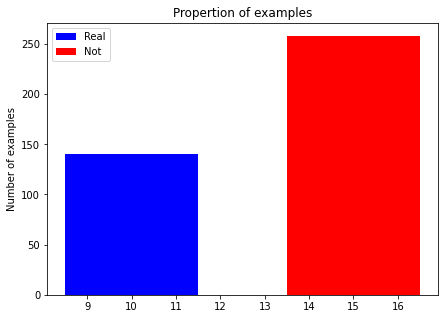

In [ ]:
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real", color='blue')
plt.bar(15,Not_len,3, label="Not", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

10. **Preparing train and test set**

In [ ]:
data.to_csv('df.csv')
df = pd.read_csv('df.csv')
df.head()

,Unnamed: 0,Tweet Id,Text,content,sentiment
0,0,1489750218992078850,@KingOfTheFay \n\nShe’d like to kiss that bloo...,"['kingofthefay', 'lik', 'kiss', 'bloody', 'mou...",-1
1,1,1489750117041074176,@libsoftiktok Life hack- step 1 try opening th...,"['libsoftiktok', 'lif', 'hack', 'step', 'try',...",-1
2,2,1489749644376784909,@Corgimine @BTSsmash @chag_spc @Light_S21 @Twe...,"['corgimin', 'btssmash', 'chagspc', 'tweekssb'...",0
3,3,1489749488721879042,"“Searing in blank of night, the serpent’s stin...","['sear', 'blank', 'night', 'serp', 'sting', 'v...",-1
4,4,1489749068137984004,@amayabutsecret Honestly Brie shilling for NFT...,"['amayabutsecret', 'honest', 'bri', 'shil', 'n...",1


In [ ]:
from sklearn.model_selection import train_test_split

sample_size = int(len(df)*0.05)
sampleDf = df.sample(sample_size, random_state=23)
x = sampleDf.content.values
y = sampleDf.sentiment.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

11. **Visualizing the embeddings**

Le word embedding désigne un ensemble de méthode d’apprentissage visant à représenter les mots d’un texte par des vecteurs de nombres réels. 

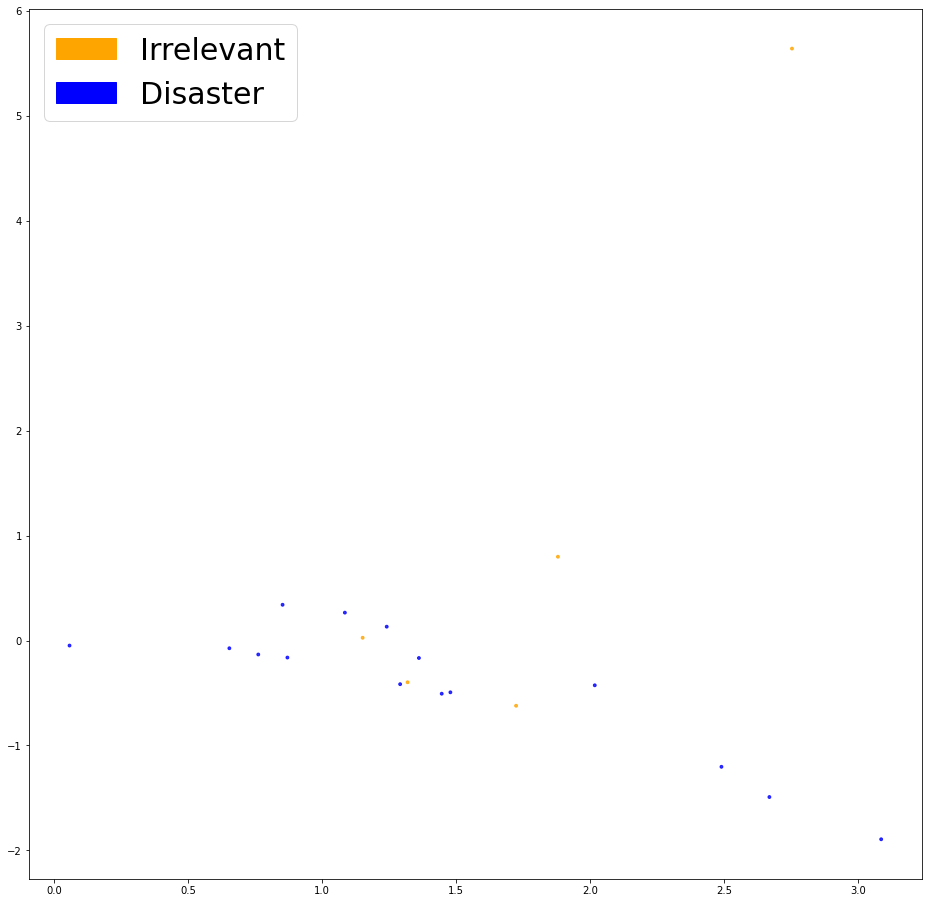

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

X_train_counts, count_vectorizer = cv(x_train)
X_test_counts = count_vectorizer.transform(x_test)

def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Irrelevant')
            green_patch = mpatches.Patch(color='blue', label='Disaster')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

12. **logisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

**Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.800, precision = 0.640, recall = 0.800, f1 = 0.711


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



13. **TF-IDF**

TF-IDF a été inventé pour la recherche de documents et la récupération d'informations. Il fonctionne en augmentant proportionnellement au nombre de fois qu'un mot apparaît dans un document, mais est compensé par le nombre de documents contenant le mot. Ainsi, les mots communs à tous les documents, tels que ceci, ont un rang inférieur même s'ils peuvent apparaître plusieurs fois, car ils ne signifient pas grand-chose pour ce document en particulier. 

In [ ]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(x_train)
X_test_tfidf = tfidf_vectorizer.transform(x_test)

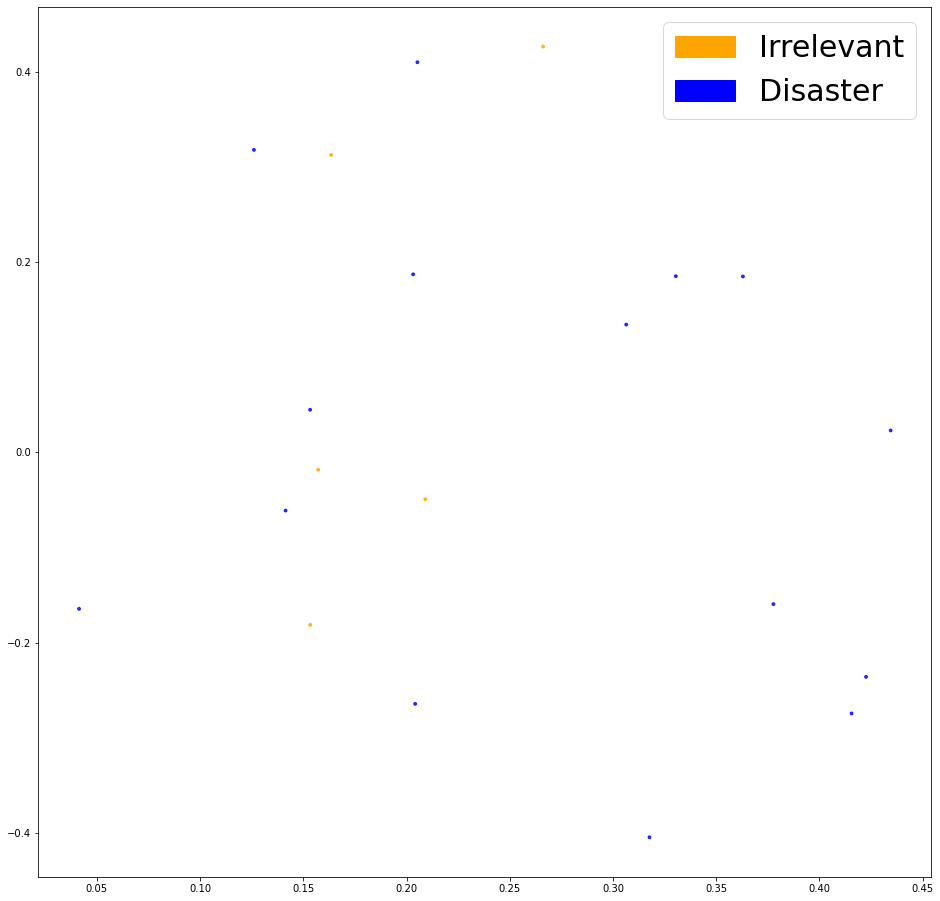

In [ ]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

14. **Most importante words** 

In [ ]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

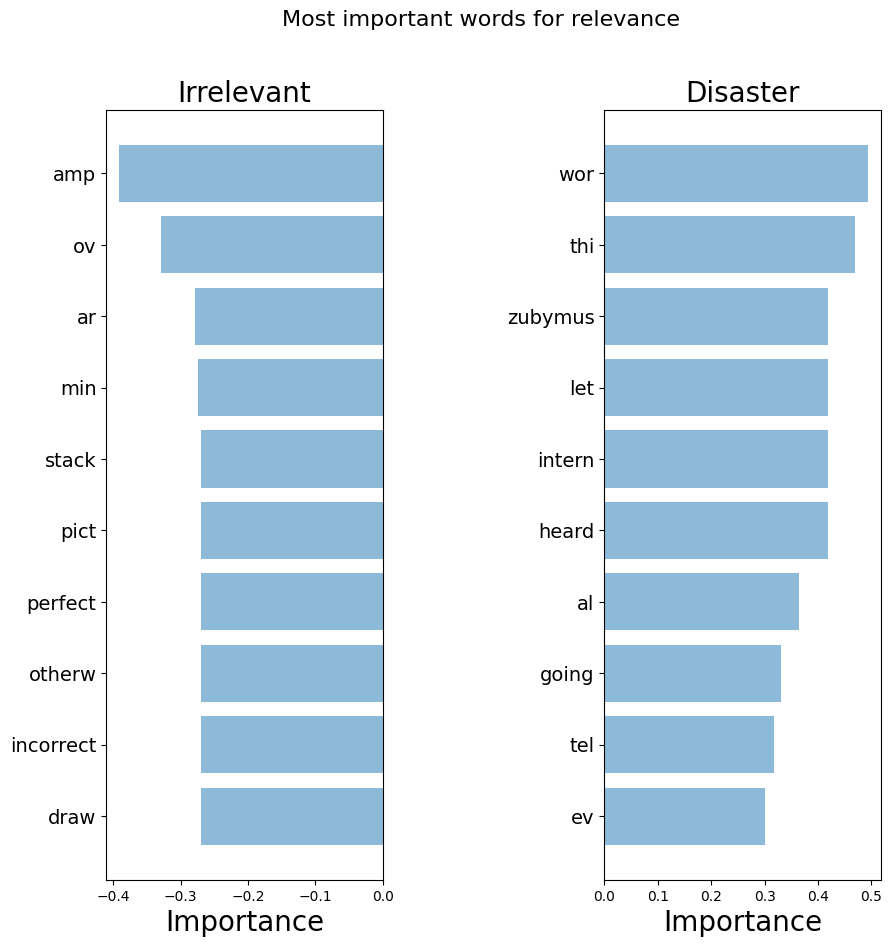

In [ ]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Irrelevant', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Disaster', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]
plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

15. **Word2Vect**

Word2vec est un groupe de modèles utilisé pour le plongement lexical.

In [ ]:
f=data["content"].values

In [ ]:
f

array([list(['kingofthefay', 'lik', 'kiss', 'bloody', 'mou', 'tast', 'wild', 'cry', 'lik', 'grip', 'tight', 'whil', 'fuck', 'leav', 'oth', 'scratched', 'bit', 'bru']),
       list(['libsoftiktok', 'lif', 'hack', 'step', 'try', 'op', 'door', 'trip', 'fal', 'claim', 'injury', 'ment', 'anct', 'step', 'sue', 'fuck', 'school', 'admin']),
       list(['corgimin', 'btssmash', 'chagspc', 'tweekssb', 'dabuzsenpa', 'mkleosb', 'elegantmat', 'glutonnyssb', 'anct']),
       list(['sear', 'blank', 'night', 'serp', 'sting', 'venom', 'heart', 'acid', 'rue', 'black', 'fant', 'seeth', 'flood', 'anct', 'blast', 'corn', 'burd', 'soul', 'alexand', 'pushkin', 'remembr', 'co']),
       list(['amayabutsecret', 'honest', 'bri', 'shil', 'nfts', 'ha', 'caus', 'mor', 'anct', 'two', 'year', 'pandem']),
       list(['djblkbeltjames', 'tour', 'talk', 'whit', 'dud', 'cal', 'n', 'word', 'talk', 'someon', 'know', 'rac', 'mer', 'speak', 'word', 'without', 'rac', 'intend', 'hear', 'word', 'caus', 'ment', 'anct', 'anybody

In [ ]:
# we will use the gensim package to get the word embedding’s from Word2Vec model.

from gensim.models import Word2Vec
# train model to get the embeddings
model = Word2Vec(f, min_count=1) 

model.most_similar('man')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


[('industry', 0.3684486746788025),
 ('han', 0.3654562830924988),
 ('comfort', 0.35451018810272217),
 ('wherev', 0.33549171686172485),
 ('u', 0.3225911855697632),
 ('anct', 0.31949371099472046),
 ('resy', 0.3087485432624817),
 ('pisah', 0.3034057915210724),
 ('caus', 0.3015918731689453),
 ('pain', 0.3014765977859497)]

In [ ]:
from sklearn.decomposition import PCA
# getting the embedding vectors
X = model[model.wv.vocab]
# dimentionality reduction using PCA
pca = PCA(n_components=2)
# running the transformations
result = pca.fit_transform(X)
# getting the corresponding words
words = list(model.wv.vocab)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# creating a dataframe from the results

df = pd.DataFrame(result, columns=list('XY'))
# adding a columns for the corresponding words
df['Words'] = words
# converting the lower case text to title case
df['Words'] = df['Words'].str.title()



In [ ]:
df.head()

,X,Y,Words
0,-0.000640,-0.001487,Kingofthefay
1,0.026273,-0.001210,Lik
2,0.001068,-0.004523,Kiss
3,-0.001267,-0.006866,Bloody
4,0.005261,0.000299,Mou


In [ ]:
import plotly.express as px
# plotting a scatter plot
fig = px.scatter(df, x="X", y="Y", text="Words", log_x=True, size_max=60)
# adjusting the text position
fig.update_traces(textposition='top center')
# setting up the height and title
fig.update_layout(
    height=600,
    title_text='Word embedding chart'
)
# displaying the figure
fig.show()

16. **Sentiment Analysis Using Bert**

BERT signifie Représentations d'encodeurs bidirectionnels à partir de transformateurs et il s'agit d'un modèle d'apprentissage automatique de pointe utilisé pour les tâches NLP. 

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 4.8 MB/s 
     |████████████████████████████████| 596 kB 39.8 MB/s 
     |████████████████████████████████| 895 kB 41.4 MB/s 
     |████████████████████████████████| 6.8 MB 11.1 MB/s 
     |████████████████████████████████| 67 kB 4.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.index.values,
                                                df.sentiment.values,
                                                test_size = 0.15,
                                                random_state=17,
                                                stratify = df.sentiment.values)

df.loc[X_train,'data_type'] = 'train'
df.loc[X_test,'data_type'] = 'test'

df.head()

,Unnamed: 0,Tweet Id,Text,content,sentiment,data_type
0,0,1489750218992078850,@KingOfTheFay \n\nShe’d like to kiss that bloo...,"['kingofthefay', 'lik', 'kiss', 'bloody', 'mou...",-1,train
1,1,1489750117041074176,@libsoftiktok Life hack- step 1 try opening th...,"['libsoftiktok', 'lif', 'hack', 'step', 'try',...",-1,test
2,2,1489749644376784909,@Corgimine @BTSsmash @chag_spc @Light_S21 @Twe...,"['corgimin', 'btssmash', 'chagspc', 'tweekssb'...",0,train
3,3,1489749488721879042,"“Searing in blank of night, the serpent’s stin...","['sear', 'blank', 'night', 'serp', 'sting', 'v...",-1,train
4,4,1489749068137984004,@amayabutsecret Honestly Brie shilling for NFT...,"['amayabutsecret', 'honest', 'bri', 'shil', 'n...",1,test


In [ ]:
df.groupby(['sentiment','data_type']).count()

Unnamed: 0  Tweet Id  Text  content
sentiment data_type                                     
-1        test               16        16    16       16
          train              87        87    87       87
 0        test               39        39    39       39
          train             219       219   219      219
 1        test               21        21    21       21
          train             119       119   119      119

In [ ]:
encoder_train = tokenizer.batch_encode_plus(df[df["data_type"]=='train'].Text.values,
                                           add_special_tokens = True,
                                            return_attention_masks = True,
                                           pad_to_max_length = True,
                                           max_length = 256,
                                           return_tensors = 'pt')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': Tru

In [ ]:
encoder_test = tokenizer.batch_encode_plus(df[df["data_type"]=='test'].Text.values,
                                           add_special_tokens = True,
                                            return_attention_masks = True,
                                           pad_to_max_length = True,
                                           max_length = 256,
                                           return_tensors = 'pt')

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {'return_attention_masks': True} not recognized.
Keyword arguments {

In [ ]:
import torch

input_ids_train = encoder_train['input_ids']
attention_masks_train = encoder_train["attention_mask"]
labels_train = torch.tensor(df[df['data_type']=='train'].sentiment.values)


input_ids_test = encoder_test['input_ids']
attention_masks_test = encoder_test["attention_mask"]
labels_test = torch.tensor(df[df['data_type']=='test'].sentiment.values)

In [ ]:
data_train = TensorDataset(input_ids_train,attention_masks_train,labels_train)
data_test = TensorDataset(input_ids_test,attention_masks_test,labels_test)

Nous utiliserons le modèle de classification de séquence car nous devons classer le texte multi-étiquettes à partir de l'ensemble de données. 

In [ ]:
from transformers import BertForSequenceClassification

#SETTING MODEL

model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                     num_labels = 6,
                                     output_attentions = False,
                                     output_hidden_states =  False) 

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from torch.utils.data import RandomSampler,SequentialSampler,DataLoader

#CREATING DATA LOADERS
dataloader_train = DataLoader(
    data_train,
    sampler= RandomSampler(data_train),
    batch_size = 16
    
)


dataloader_test = DataLoader(
    data_test,
    sampler= RandomSampler(data_test),
    batch_size = 32
    
)


In [ ]:
from transformers import AdamW,get_linear_schedule_with_warmup

#SETTING OPTIMIZERS

optimizer = AdamW(model.parameters(),lr = 1e-5,eps = 1e-8)

epochs  = 10
scheduler = get_linear_schedule_with_warmup(
            optimizer,
    num_warmup_steps = 0,
   num_training_steps = len(dataloader_train)*epochs 
)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



In [ ]:
#Defining Model metrics

from sklearn.metrics import f1_score 
#FUNCTION TO CALCULATE F1 SCORE

def f1_score_func(preds,labels):
    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat,preds_flat,average = 'weighted')

##FUNCTION FOR CALCULATING ACCURACY PER CLASS

def accuracy_per_class(preds,labels):
    label_dict_reverse = {v:k for k,v in dict_label.items()}
    
    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f"Class:{label_dict_reverse}")
        print(f"Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n")

import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(f"Loading:{device}")

Loading:cpu


In [ ]:
from tqdm.notebook import tqdm

#FUNCTION FOR MODEL EVALUATION
def evaluate(dataloader_val):
    model.eval()
    
    loss_val_total = 0
    predictions,true_vals = [],[]
    
    for batch in tqdm(dataloader_val):
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':  batch[0],
                  'attention_mask':batch[1],
                  'labels': batch[2]
                 }
        with torch.no_grad():
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total +=loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
        
        
    loss_val_avg = loss_val_total/len(dataloader_val)  
    
    predictions = np.concatenate(predictions,axis=0)
    true_vals = np.concatenate(true_vals,axis=0) 
    return loss_val_avg,predictions,true_vals
            

In [ ]:
#training the model

for epoch in tqdm(range(1, epochs+1)):
    model.train()
    
    loss_train_total = 0
    
    progress_bar = tqdm(dataloader_train, 
                        desc ='Epoch {:1d}'.format(epoch),
                        leave=False,
                       disable=False
                       )
    for batch in progress_bar:
        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = { 'input_ids' : batch[0],
                 'attention_mask' : batch[1],
                 'labels' : batch[2]
                 }
        outputs = model(**inputs)
        
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
    
    # THIS SECTION OF CODE IS JUST FOR PRINTING VALUES AFTER EACH EPOCH.
    torch.save(model.state_dict(), f'BERT_ft_epoch{epoch}.model')
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 score (weighted): {val_f1}')  